# DATA SET NEeded: AB_NYC_2019.csv

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import requests
import json
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Import the file
df = pd.read_csv("listings 2.csv")

#Filter for Manhattan Metropolitean Area
df = df[df["neighbourhood_group_cleansed"]=="Manhattan"]

#Print out some summary statistics on the price variable
df = df[["id","name","availability_90","neighbourhood_cleansed","neighbourhood_group_cleansed","neighbourhood","maximum_nights","experiences_offered","host_response_time","host_response_rate","host_neighbourhood","host_identity_verified","zipcode","latitude","longitude","property_type","room_type","bathrooms","bed_type","price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_value","cancellation_policy"]]


/Users/Felix/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df['price'] = df['price'].apply(clean_currency).astype('float')


In [4]:
#Winsorize the values by deleting all values over the .99 quantile
upper = df["price"].quantile(0.99)

df = df[df["price"]<=upper]

Even though some prices are very high, I will leave them within the dataset as those outliers still contribute to the overall model and are kind of understandable in New York City

In [5]:
#df[df["price"]<1000].sort_values("price").tail(2)
df.head(2)

id                                       name  availability_90  \
0  2595                      Skylit Midtown Castle                1   
2  5099  Large Cozy 1 BR Apartment In Midtown East               19   

  neighbourhood_cleansed neighbourhood_group_cleansed neighbourhood  \
0                Midtown                    Manhattan       Midtown   
2            Murray Hill                    Manhattan     Manhattan   

   maximum_nights experiences_offered host_response_time host_response_rate  \
0            1125                none       within a day                85%   
2              21                none                NaN                NaN   

  host_neighbourhood host_identity_verified zipcode  latitude  longitude  \
0            Midtown                      t   10018  40.75362  -73.98377   
2  Flatiron District                      f   10016  40.74767  -73.97500   

  property_type        room_type  bathrooms  bed_type  price security_deposit  \
0     Apartment  Entire home/apt        1.0  Real Bed  225.0          $350.00   
2     Apartment  Entire home/apt        1.0  Real Bed  200.0          $300.00   

  cleaning_fee  guests_included extra_people  minimum_nights  \
0       $95.00                1        $0.00              10   
2      $125.00                2      $100.00               3   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                 48                  94.0                     9.0   
2                 78                  90.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                        9.0                   10.0   
2                        9.0                   10.0   

   review_scores_communication  review_scores_value  \
0                         10.0                  9.0   
2                         10.0                  9.0   

           cancellation_policy  
0  strict_14_with_grace_period  
2                     moderate

In [6]:
df.groupby("neighbourhood_cleansed").count()


id  name  availability_90  \
neighbourhood_cleansed                                
Battery Park City         70    69               70   
Chelsea                 1150  1150             1150   
Chinatown                373   372              373   
Civic Center              42    42               42   
East Harlem             1149  1149             1149   
East Village            1874  1873             1874   
Financial District       728   728              728   
Flatiron District         72    72               72   
Gramercy                 346   346              346   
Greenwich Village        366   365              366   
Harlem                  2740  2739             2740   
Hell's Kitchen          2044  2043             2044   
Inwood                   254   254              254   
Kips Bay                 442   442              442   
Little Italy             107   107              107   
Lower East Side          931   931              931   
Marble Hill               12    12               12   
Midtown                 1490  1490             1490   
Morningside Heights      337   337              337   
Murray Hill              508   508              508   
NoHo                      71    71               71   
Nolita                   278   277              278   
Roosevelt Island          82    82               82   
SoHo                     346   346              346   
Stuyvesant Town           41    41               41   
Theater District         290   290              290   
Tribeca                  188   188              188   
Two Bridges               76    76               76   
Upper East Side         1790  1790             1790   
Upper West Side         1962  1961             1962   
Washington Heights       942   941              942   
West Village             761   761              761   

                        neighbourhood_group_cleansed  neighbourhood  \
neighbourhood_cleansed                                                
Battery Park City                                 70             70   
Chelsea                                         1150           1150   
Chinatown                                        373            373   
Civic Center                                      42             42   
East Harlem                                     1149           1149   
East Village                                    1874           1874   
Financial District                               728            728   
Flatiron District                                 72             72   
Gramercy                                         346            346   
Greenwich Village                                366            366   
Harlem                                          2740           2740   
Hell's Kitchen                                  2044           2044   
Inwood                                           254            254   
Kips Bay                                         442            442   
Little Italy                                     107            107   
Lower East Side                                  931            931   
Marble Hill                                       12             12   
Midtown                                         1490           1490   
Morningside Heights                              337            337   
Murray Hill                                      508            508   
NoHo                                              71             71   
Nolita                                           278            278   
Roosevelt Island                                  82             82   
SoHo                                             346            346   
Stuyvesant Town                                   41             41   
Theater District                                 290            290   
Tribeca                                          188            188   
Two Bridges                                       76             76   
Upper East Side          

In [7]:
#Sort the Data for boxplot
grouped = df.groupby("neighbourhood_cleansed")
users_sorted_average = pd.DataFrame({col:vals['price'] for col,vals in grouped}).mean().sort_values(ascending=True) 



<AxesSubplot:xlabel='price', ylabel='neighbourhood_cleansed'>

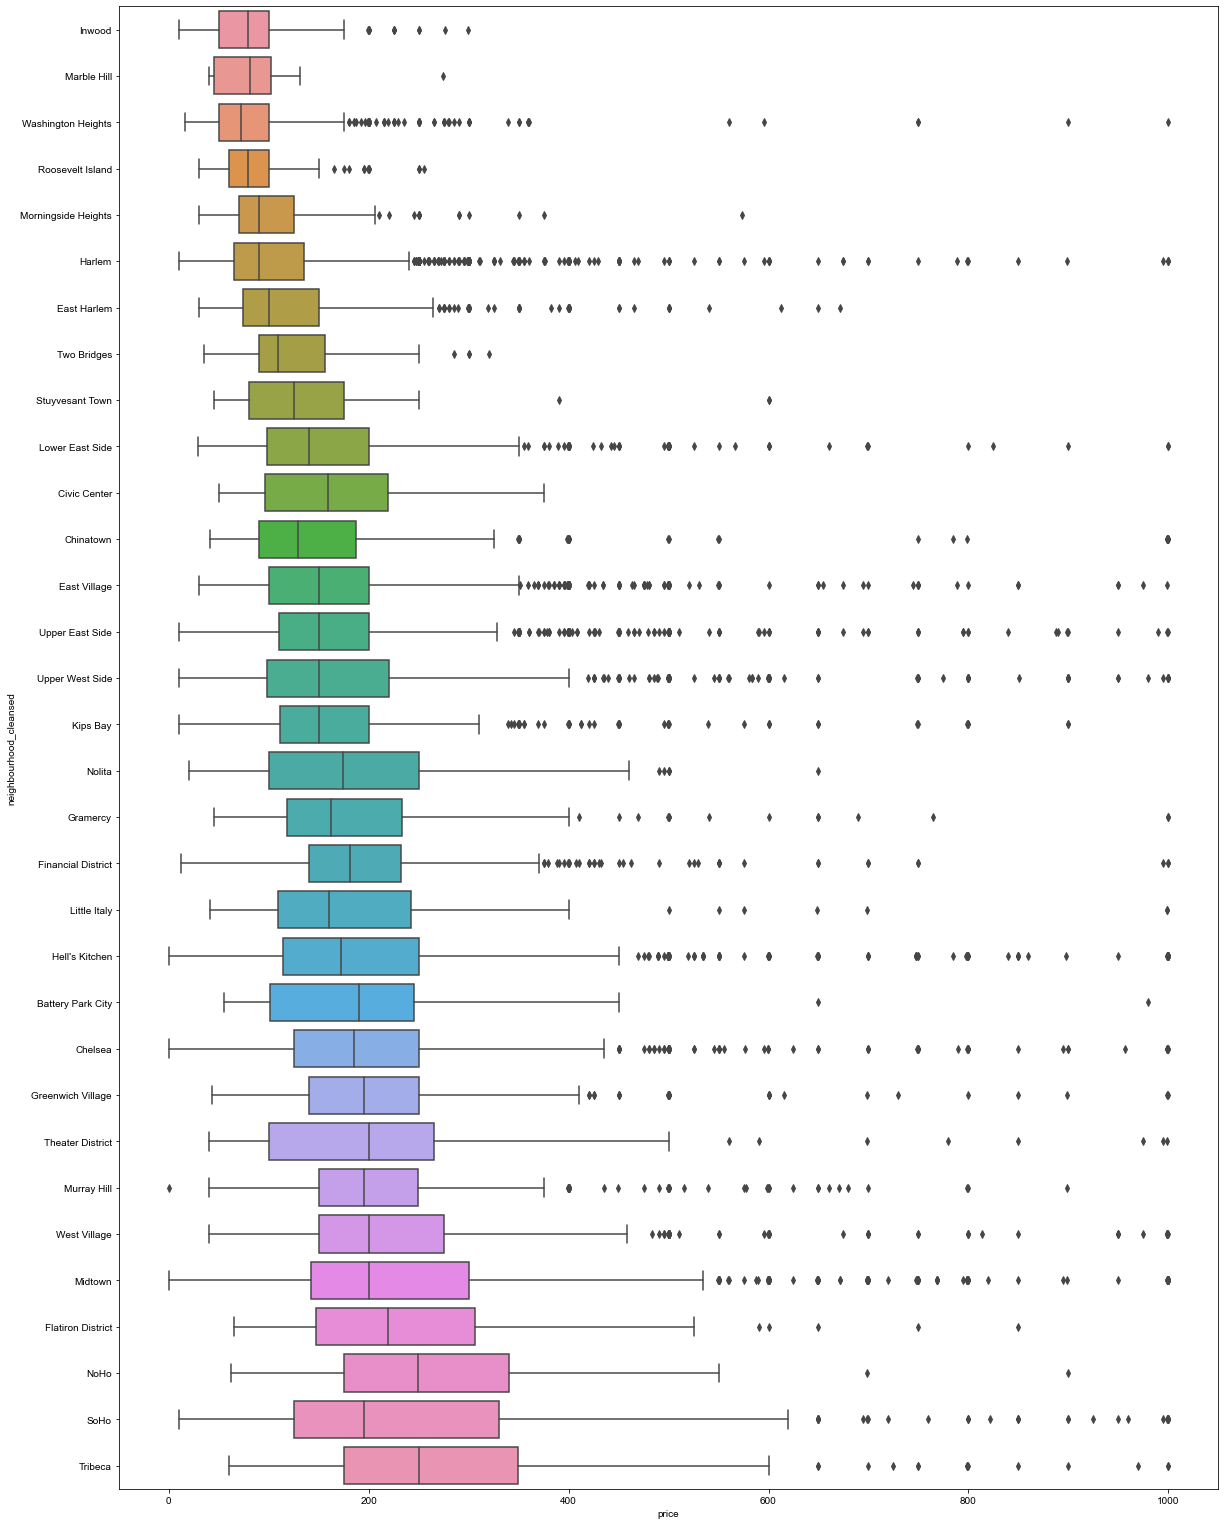

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

a4_dims = (19.7, 27.27)
fig, ax = plt.subplots(figsize=a4_dims)

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.boxplot(y=df["neighbourhood_cleansed"], x=df["price"],order=users_sorted_average.index)

In [100]:
df.head(2)

data = df[["availability_90","neighbourhood_cleansed","maximum_nights","minimum_nights","host_identity_verified","zipcode","latitude","longitude","property_type","room_type","bathrooms","bed_type","price","number_of_reviews","review_scores_value","cancellation_policy"]] 

data.shape

data_NaN = pd.get_dummies(data.drop("zipcode",axis=1))

data_NaN.shape

(21862, 79)

In [11]:
# Getting the Dummy Data

#Dropping NaN
data = data.dropna(axis=0)

#Copy for Later without Dummy
data_copy = data

# Getting the Dummy Data

data = pd.get_dummies(data)

data.shape

(15939, 145)

In [12]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data)

trans_data = scaler.transform(data)

# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(trans_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 5, ..., 1, 1, 2], dtype=int32)

In [13]:
data_copy["Cluster"] = kmeans.labels_
data["Cluster"] = kmeans.labels_

data.head()

data["latitude"] = df["latitude"]
data["longitude"] = df["longitude"]

visual_data = data[["Cluster","latitude","longitude","price"]]

#Initialise a new Column
visual_data["ClusterS"] = "Default Cluster"

#Fill in the Strings for each column
visual_data.ClusterS[visual_data.Cluster==0] = "Cluster 1"
visual_data.ClusterS[visual_data.Cluster==1] = "Cluster 2"
visual_data.ClusterS[visual_data.Cluster==2] = "Cluster 3"
visual_data.ClusterS[visual_data.Cluster==3] = "Cluster 4"
visual_data.ClusterS[visual_data.Cluster==4] = "Cluster 5"
visual_data.ClusterS[visual_data.Cluster==5] = "Cluster 6"
visual_data.ClusterS[visual_data.Cluster==6] = "Cluster 7"

visual_data.groupby("Cluster")["price"].describe()


/Users/Felix/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/Felix/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/Felix/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

count        mean         std   min    25%    50%     75%     max
Cluster                                                                    
0         996.0  239.134538  164.139155   0.0  135.0  190.5  287.00  1000.0
1        5892.0  195.286999  131.212587   0.0  110.0  165.0  230.00  1000.0
2        6001.0  135.874854  103.936653  10.0   75.0  105.0  165.00  1000.0
3         936.0  121.290598   75.995152  30.0   75.0  100.0  150.00   672.0
4         450.0  200.695556  101.828312  45.0  139.0  181.0  230.75   750.0
5        1664.0  188.170673  120.345148   0.0  103.0  159.0  230.00  1000.0

<AxesSubplot:xlabel='price', ylabel='ClusterS'>

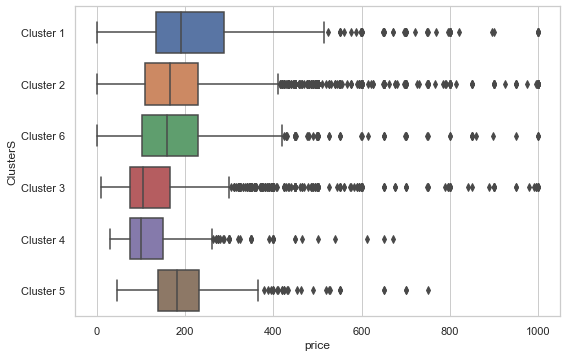

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

a4_dims = (8.7, 5.7)
fig, ax = plt.subplots(figsize=a4_dims)

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.boxplot(y=visual_data["ClusterS"], x=visual_data["price"])

In [246]:
#To visualize the data we can use a subset from the data as all points are to many to visualize properly

visual_input = visual_data.sample(5000)


visual_input.head(2)

Cluster  latitude  longitude  price   ClusterS
24545        0  40.75614  -73.96706  225.0  Cluster 1
14993        2  40.82125  -73.95000   67.0  Cluster 3

# Visualize the Results

In [247]:
# create map
map_clusters = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster, clusterS, price in zip(visual_input['latitude'], visual_input['longitude'], visual_input["Cluster"], visual_input['ClusterS'],visual_input["price"]):
    label = folium.Popup(clusterS + " that costs:" +str(price)+" $", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [254]:
data.head()


availability_90  maximum_nights  minimum_nights  latitude  longitude  \
0                1            1125              10  40.75362  -73.98377   
2               19              21               3  40.74767  -73.97500   
4               40              14               2  40.76489  -73.98493   
5                0              14               2  40.80178  -73.96723   
6                1            1125               1  40.71344  -73.99037   

   bathrooms  price  number_of_reviews  review_scores_value  \
0        1.0  225.0                 48                  9.0   
2        1.0  200.0                 78                  9.0   
4        1.0   79.0                454                  8.0   
5        1.0   79.0                118                 10.0   
6        1.0  150.0                161                  9.0   

   neighbourhood_cleansed_Battery Park City  neighbourhood_cleansed_Chelsea  \
0                                         0                               0   
2                                         0                               0   
4                                         0                               0   
5                                         0                               0   
6                                         0                               0   

   neighbourhood_cleansed_Chinatown  neighbourhood_cleansed_Civic Center  \
0                                 0                                    0   
2                                 0                                    0   
4                                 0                                    0   
5                                 0                                    0   
6                                 1                                    0   

   neighbourhood_cleansed_East Harlem  neighbourhood_cleansed_East Village  \
0                                   0                                    0   
2                                   0                                    0   
4                                   0                                    0   
5                                   0                                    0   
6                                   0                                    0   

   neighbourhood_cleansed_Financial District  \
0                                          0   
2                                          0   
4                                          0   
5                                          0   
6                                          0   

   neighbourhood_cleansed_Flatiron District  neighbourhood_cleansed_Gramercy  \
0                                         0                                0   
2                                         0                                0   
4                                         0                                0   
5                                         0                                0   
6                                         0                                0   

   neighbourhood_cleansed_Greenwich Village  neighbourhood_cleansed_Harlem  \
0                                         0                              0   
2                                         0                              0   
4                                         0                              0   
5                                         0                              0   
6                                         0                              0   

   neighbourhood_cleansed_Hell's Kitchen  neighbourhood_cleansed_Inwood  \
0                                      0                              0   
2                                      0                              0   
4                                      1                              0   
5                                      0                              0   
6                                      0                              0   

   neighbourhood_cleansed_Kips Bay  neighbourhood_cleansed_Little Italy  \
0      

In [23]:
data_NaN.head()

availability_90  maximum_nights  minimum_nights  latitude  longitude  \
0                1            1125              10  40.75362  -73.98377   
2               19              21               3  40.74767  -73.97500   
4               40              14               2  40.76489  -73.98493   
5                0              14               2  40.80178  -73.96723   
6                1            1125               1  40.71344  -73.99037   

   bathrooms  price  number_of_reviews  review_scores_value  \
0        1.0  225.0                 48                  9.0   
2        1.0  200.0                 78                  9.0   
4        1.0   79.0                454                  8.0   
5        1.0   79.0                118                 10.0   
6        1.0  150.0                161                  9.0   

   neighbourhood_cleansed_Battery Park City  neighbourhood_cleansed_Chelsea  \
0                                         0                               0   
2                                         0                               0   
4                                         0                               0   
5                                         0                               0   
6                                         0                               0   

   neighbourhood_cleansed_Chinatown  neighbourhood_cleansed_Civic Center  \
0                                 0                                    0   
2                                 0                                    0   
4                                 0                                    0   
5                                 0                                    0   
6                                 1                                    0   

   neighbourhood_cleansed_East Harlem  neighbourhood_cleansed_East Village  \
0                                   0                                    0   
2                                   0                                    0   
4                                   0                                    0   
5                                   0                                    0   
6                                   0                                    0   

   neighbourhood_cleansed_Financial District  \
0                                          0   
2                                          0   
4                                          0   
5                                          0   
6                                          0   

   neighbourhood_cleansed_Flatiron District  neighbourhood_cleansed_Gramercy  \
0                                         0                                0   
2                                         0                                0   
4                                         0                                0   
5                                         0                                0   
6                                         0                                0   

   neighbourhood_cleansed_Greenwich Village  neighbourhood_cleansed_Harlem  \
0                                         0                              0   
2                                         0                              0   
4                                         0                              0   
5                                         0                              0   
6                                         0                              0   

   neighbourhood_cleansed_Hell's Kitchen  neighbourhood_cleansed_Inwood  \
0                                      0                              0   
2                                      0                              0   
4                                      1                              0   
5                                      0                              0   
6                                      0                              0   

   neighbourhood_cleansed_Kips Bay  neighbourhood_cleansed_Little Italy  \
0      

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [117]:
X = data_NaN.drop(["price"],1)
y = data_NaN["price"]

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()

availability_90  maximum_nights  minimum_nights  latitude  longitude  \
48488                5            1125              30  40.82432  -73.95290   
30038               32              29               1  40.76147  -73.99580   
15787               90            1125              30  40.75695  -73.97988   
24157                9             180               7  40.80044  -73.95139   
2758                37              60               1  40.80012  -73.94087   

       bathrooms  number_of_reviews  review_scores_value  \
48488        1.0                  1                 10.0   
30038        1.0                 32                  9.0   
15787        1.0                  2                 10.0   
24157        1.0                 17                  9.0   
2758         1.0                259                 10.0   

       neighbourhood_cleansed_Battery Park City  \
48488                                         0   
30038                                         0   
15787                                         0   
24157                                         0   
2758                                          0   

       neighbourhood_cleansed_Chelsea  neighbourhood_cleansed_Chinatown  \
48488                               0                                 0   
30038                               0                                 0   
15787                               0                                 0   
24157                               0                                 0   
2758                                0                                 0   

       neighbourhood_cleansed_Civic Center  \
48488                                    0   
30038                                    0   
15787                                    0   
24157                                    0   
2758                                     0   

       neighbourhood_cleansed_East Harlem  \
48488                                   0   
30038                                   0   
15787                                   0   
24157                                   0   
2758                                    1   

       neighbourhood_cleansed_East Village  \
48488                                    0   
30038                                    0   
15787                                    0   
24157                                    0   
2758                                     0   

       neighbourhood_cleansed_Financial District  \
48488                                          0   
30038                                          0   
15787                                          0   
24157                                          0   
2758                                           0   

       neighbourhood_cleansed_Flatiron District  \
48488                                         0   
30038                                         0   
15787                                         0   
24157                                         0   
2758                                          0   

       neighbourhood_cleansed_Gramercy  \
48488                                0   
30038                                0   
15787                                0   
24157                                0   
2758                                 0   

       neighbourhood_cleansed_Greenwich Village  \
48488                                         0   
30038                                         0   
15787                                         0   
24157                                         0   
2758                                          0   

       neighbourhood_cleansed_Harlem  neighbourhood_cleansed_Hell's Kitchen  \
48488                              1                                      0   
30038                              0                                      1   
15787                              0                                      0   
24157                              1                                      0   
2758         

In [122]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.65, learning_rate = 0.5,max_depth = 6, alpha = 20, n_estimators = 20)
xg_reg.fit(X_train,y_train)

rmse = np.sqrt(mean_squared_error(y_test, preds))


print("RMSE: %f" % (rmse))
print(xg_reg.score(X_test,y_test))

[00:56:54] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 93.475927
0.49517826981958224


In [119]:
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))

RMSE: 93.475927


In [123]:
X = data.drop(["price"],1)
y = data["price"]

data_dmatrix = xgb.DMatrix(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


xg_reg = xgb.XGBRegressor(reg_lambda=0.9,objective ='reg:linear', colsample_bytree = 0.65, learning_rate = 0.5,max_depth = 5, alpha = 0.02, n_estimators = 20)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE: %f" % (rmse))
print(xg_reg.score(X_test,y_test))

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.neighbourhood_cleansed, host_identity_verified, zipcode, property_type, room_type, bed_type, cancellation_policy